# [E-07] 인물사진을 만들어 보자

이번 프로젝트는 딥러닝을 적용하여 핸드폰 인물 사진 모드의 아웃포커싱을 구현해보는 것을 목표로 한다.

<hr>

## 1. 인물 사진 배경 흐리게 하기

In [1]:
# 라이브러리 불러오기
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(2160, 2160, 3)


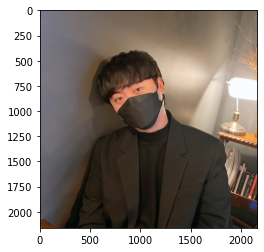

In [2]:
# 이미지 불러오기
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/human.jpeg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 시맨틱 세그멘테이션

In [3]:
# 저장할 파일 이름을 결정
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드
urllib.request.urlretrieve(model_url, model_file)

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

segvalues, output = model.segmentAsPascalvoc(img_path)

In [4]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

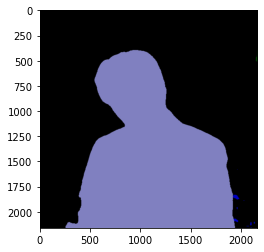

In [5]:
plt.imshow(output)
plt.show()

In [6]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person
pottedplant


In [7]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[15]

array([192, 128, 128])

(2160, 2160)


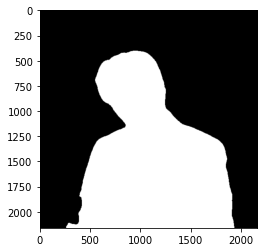

In [8]:
seg_color = (128,128,192)  # RGB순서로 바꿈

# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)
seg_map = np.all(output==seg_color, axis=-1)  
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

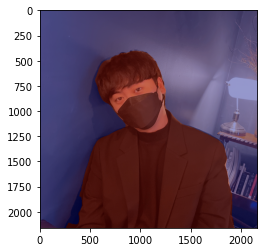

In [9]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줌
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 변경
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합치기
# 0.6과 0.4는 두 이미지를 섞는 비율
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 배경 흐리게 하기

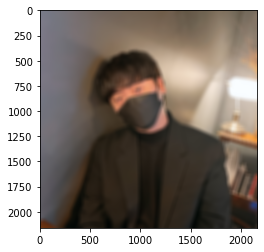

In [10]:
img_orig_blur = cv2.blur(img_orig, (50,50))  # blurring kernel size는 (50, 50)으로 설정
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

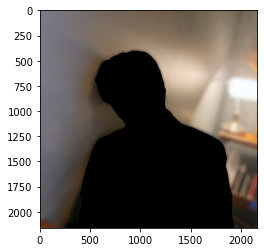

In [11]:
# 세그멘테이션 마스크를 이용해 배경만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

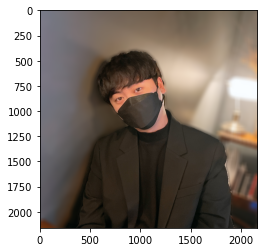

In [12]:
# 배경과 사람 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 2. 고양이 사진 배경 흐리게 하기

(3024, 3024, 3)


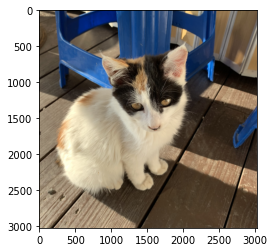

In [13]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat.jpeg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# 저장할 파일 이름을 결정
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드
urllib.request.urlretrieve(model_url, model_file)

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

segvalues, output = model.segmentAsPascalvoc(img_path)

LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

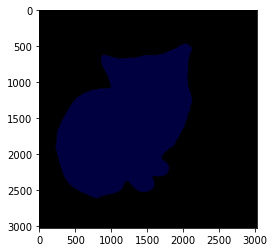

In [14]:
plt.imshow(output)
plt.show()

In [15]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


In [16]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[8]

array([64,  0,  0])

(3024, 3024)


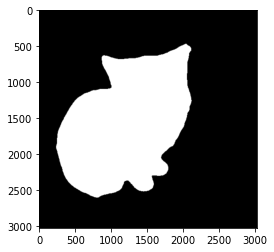

In [17]:
seg_color = (0, 0, 64)  # RGB순서로 바꿈

# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)
seg_map = np.all(output==seg_color, axis=-1)  
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

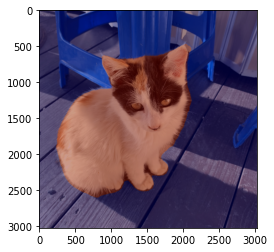

In [18]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줌
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 변경
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합치기
# 0.6과 0.4는 두 이미지를 섞는 비율
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

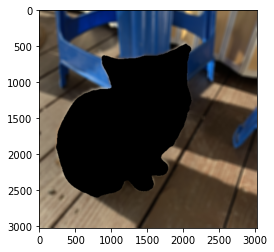

In [19]:
# 이미지 흐리게 처리
img_orig_blur = cv2.blur(img_orig, (50,50))  # blurring kernel size는 (50, 50)으로 설정
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))

# 세그멘테이션 마스크를 이용해 배경만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

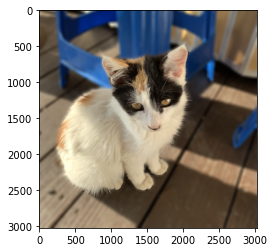

In [20]:
# 배경과 고양이 합치기
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 3. 배경 전환 크로마키

(3024, 3024, 3)


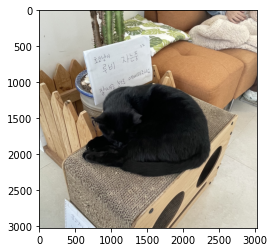

In [21]:
# 이미지 불러오기
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/black_cat.jpeg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
# 저장할 파일 이름을 결정
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드
urllib.request.urlretrieve(model_url, model_file)

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

segvalues, output = model.segmentAsPascalvoc(img_path)

LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

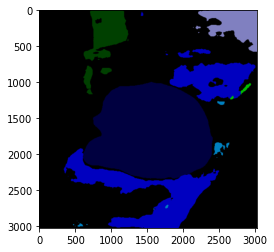

In [23]:
plt.imshow(output)
plt.show()

In [24]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
chair
diningtable
person
pottedplant
sofa


In [25]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[8]

array([64,  0,  0])

(3024, 3024)


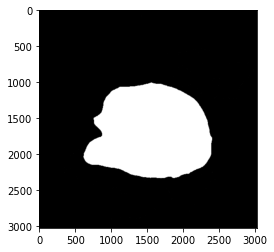

In [26]:
seg_color = (0, 0, 64)  # RGB순서로 바꿈

# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)
seg_map = np.all(output==seg_color, axis=-1)  
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

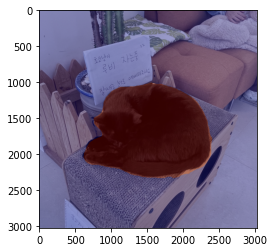

In [27]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줌
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 변경
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합치기
# 0.6과 0.4는 두 이미지를 섞는 비율
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [28]:
# 배경 이미지 불러오기
bg_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/xmas.jpeg'
bg_orig = cv2.imread(bg_path)
target_size = (img_orig.shape[1], img_orig.shape[0])
bg_resized = cv2.resize(bg_orig, target_size)

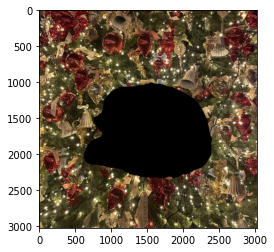

In [29]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_chroma = cv2.bitwise_and(bg_resized, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_chroma, cv2.COLOR_BGR2RGB))
plt.show()

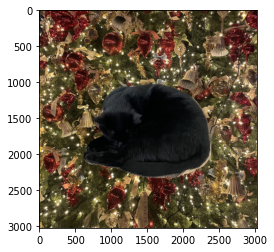

In [30]:
img_concat = np.where(img_mask_color==255, img_orig, bg_resized)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 발생한 문제점들

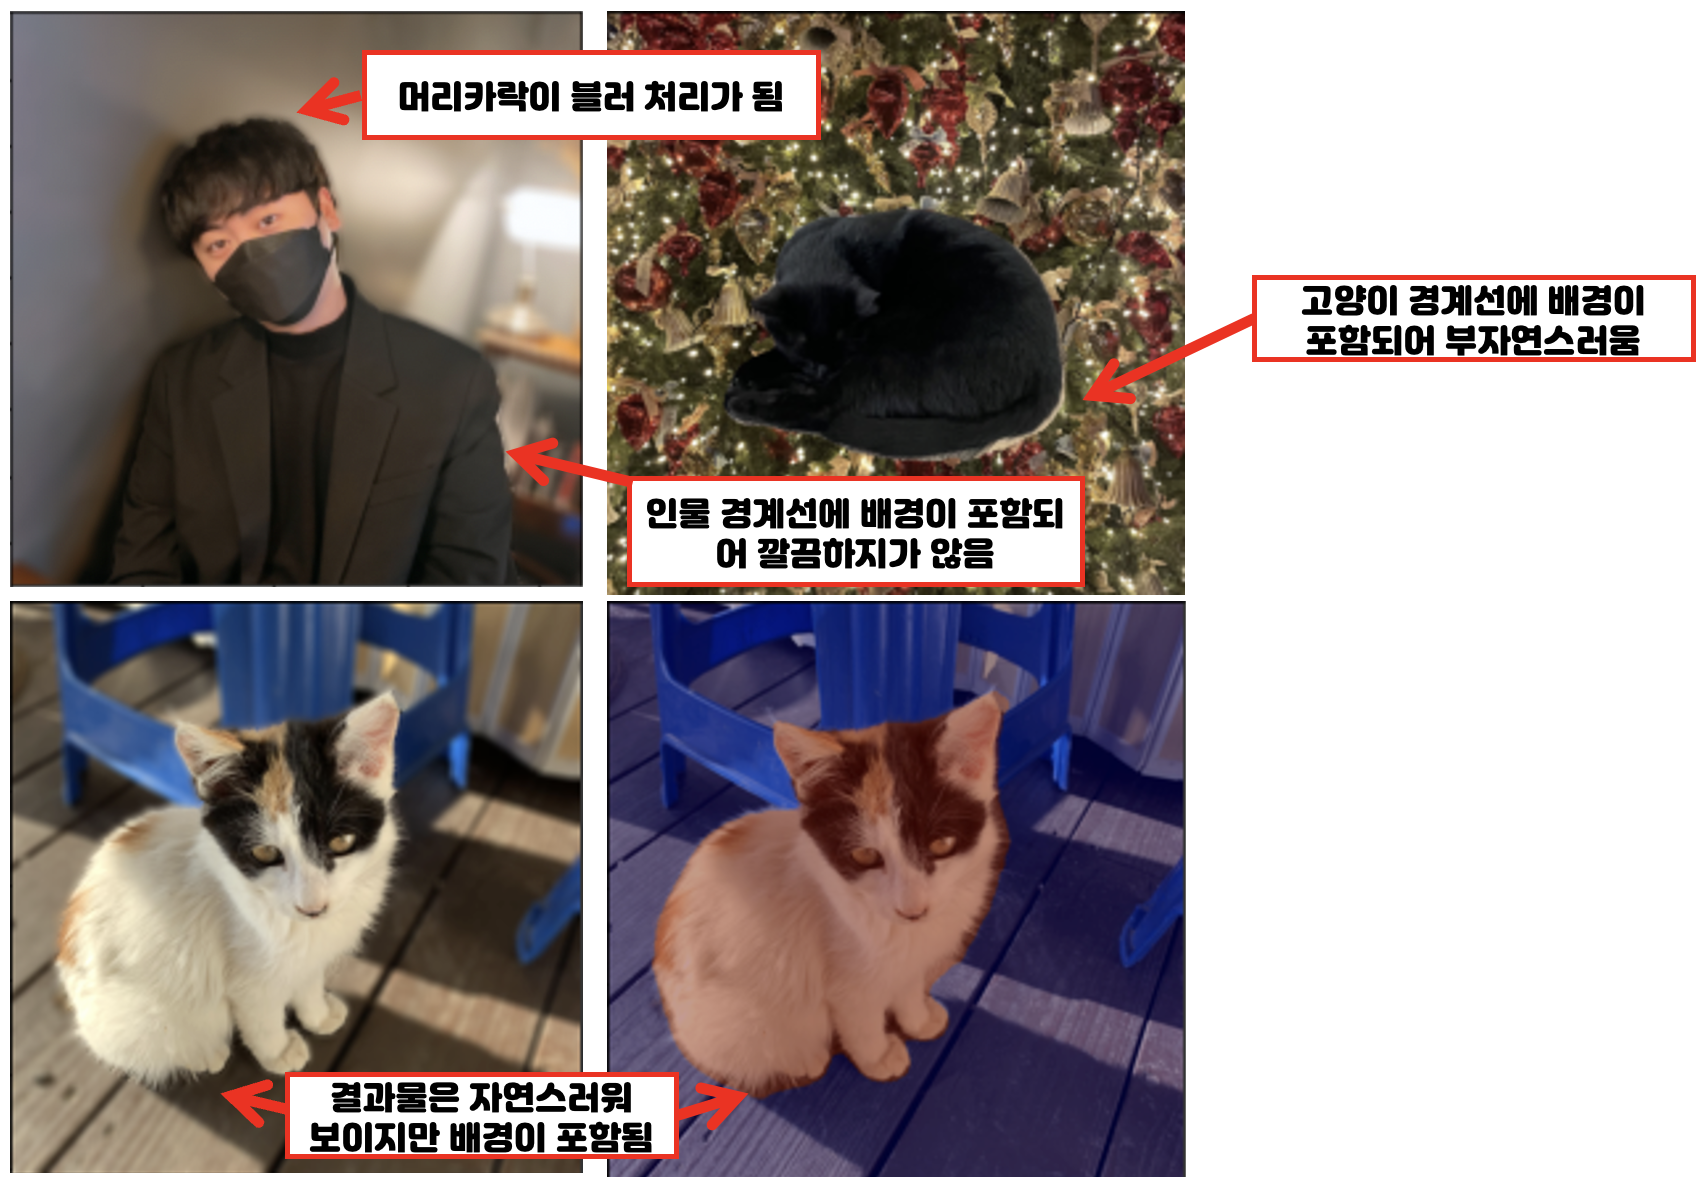

## 솔루션 제시

시맨틱 세그멘테이션은 이미지의 각 픽셀이 어떤 클래스에 속하는지 예측하는 것이 목적이다. 하지만 해상도가 높은 이미지를 사용하지 않는 이상 분류된 클래스의 경계가 부자연스러운 것을 확인할 수 있다. 또한 이번 프로젝트에서는 나타나지 않았지만 클래스가 동일한 다른 피사체를 함께 인식해버리는 경우도 생길 수도 있다. 물론 인스턴스 세그멘테이션을 활용하면 다른 피사체들을 포함시키지 않을 수 있을 것 같다. 하지만 확실한 방법으로는 Monodepth2와 같이 depth 정보를 추정하여 적당한 depth를 가진 정보들만 추출해내는 방법이 있다. 우리가 아웃포커싱을 통해 효과를 얻으려는 피사체들은 대부분 배경보다 가깝게 위치해 있기 때문이다. 이미지에 따라 적절한 거리를 입력하여 그에 해당하는 이미지만을 추출한다면 배경과 좀더 확실하게 구분할 수 있을 것이다.

## <프로젝트 회고>

이번 프로젝트에서는 이미지를 활용해 세그멘테이션을 다뤄보는 법을 배웠다. 특히 컴퓨터 비젼에서 핵심 분야라는 시맨틱 세그멘테이션에 대해서 깊게 공부할 수 있었다. 비록 이번 프로젝트에서는 간단한 작업으로 진행이 되었지만 추가로 조사를 하면서 시맨틱 세그멘테이션 기술을 활용한 다양한 예시들을 확인해볼 수 있었다.

이번에 다룬 세 가지 이미지에서는 공통적으로 경계선이 확실하게 구분되지 않았다는 문제점들이 있었다. 이를 해결하기 위한 솔루션을 조사해 본 결과 Monodepth2와 같은 depth 정보를 활용한 기술들을 활용하면 되겠다는 생각을 하였다. 조사를 하면서 생각보다 다양한 방법들로 이미지를 처리한다는 것을 알게 되었다. 다양한 모델들을 활용하여 인물 사진 모드를 구현해내는 연습이 필요할 것 같다.